# Cómo interpretar los índices de percepciones: escalas cualitativas

Paquetes utilizados en el análisis:

In [9]:
# Paquetes utilizados en el análisis:
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
# Datos utilizados en el análisis:
data = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/publicaciones/main/escala_cualitativa/ipeco-2021-03-08.csv', parse_dates=True, index_col='Mes')
data.columns = ['ipeco', 'coyuntura', 'expectativas', 'sea', 'da', 'sef', 'df', 'iif', 'ipecotm']
data.head()

,ipeco,coyuntura,expectativas,sea,da,sef,df,iif,ipecotm
Mes,,,,,,,,,
2001-12-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,NaN
2002-03-01,102.15,98.57,103.70,102.30,93.43,100.32,100.44,109.14,NaN
2002-06-01,108.16,86.22,116.39,105.32,48.78,113.80,128.51,111.21,103.44
2002-09-01,101.68,106.01,100.34,113.55,93.15,109.55,80.43,103.96,104.00
2002-12-01,100.38,84.32,106.45,86.19,82.68,106.64,113.49,101.75,103.40


A continuación se dividen los indicadores por su valores iniciales:

In [11]:
# Valores iniciales del Ipeco:
ipeco0 = 0.564465028
coyuntura0 = 0.375772273
expectativas0 = 0.688636166
sea0 = 0.503225806
da0 = 0.241887388
sef0 = 0.778145695
df0 = 0.502857143
iif0 = 0.78490566

data['ipeco'] = data['ipeco']*ipeco0
data['coyuntura'] = data['coyuntura']*coyuntura0
data['expectativas'] = data['expectativas']*expectativas0
data['sea'] = data['sea']*sea0
data['da'] = data['da']*da0
data['sef'] = data['sef']*sef0
data['df'] = data['df']*df0
data['iif'] = data['iif']*iif0
data = data.drop('ipecotm', axis=1)
data.head()


,ipeco,coyuntura,expectativas,sea,da,sef,df,iif
Mes,,,,,,,,
2001-12-01,56.446503,37.577227,68.863617,50.322581,24.188739,77.814569,50.285714,78.490566
2002-03-01,57.660103,37.039873,71.411570,51.480000,22.599539,78.063576,50.506971,85.664604
2002-06-01,61.052537,32.399085,80.150363,52.999742,11.799267,88.552980,64.622171,87.289358
2002-09-01,57.394804,39.835619,69.097753,57.141290,22.531810,85.245861,40.444800,81.598792
2002-12-01,56.661000,31.685118,73.305320,43.373032,19.999249,82.981457,57.069257,79.864151


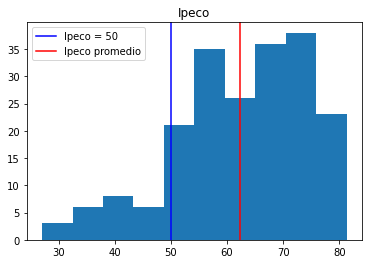

In [12]:
# Histograma del Ipeco
plt.hist(data['ipeco'])
plt.axvline(x=50, color='b', label='Ipeco = 50')
plt.axvline(x=data['ipeco'].mean(), color='r', label='Ipeco promedio')
plt.title('Ipeco')
plt.legend()

In [13]:
# Valores optimistas del Ipeco
print((data['ipeco'] > 50).mean())

0.8762376237623762


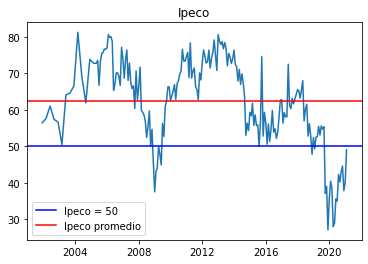

In [14]:
# Ipeco serie de tiempo:
plt.plot(data['ipeco'])
plt.axhline(y=50, color='b', label='Ipeco = 50')
plt.axhline(y=data['ipeco'].mean(), color='r', label='Ipeco promedio')
plt.title('Ipeco')
plt.legend()

Descripción de los datos:

In [15]:
mean_median = data.agg(['mean', 'median'])
mean_median.to_csv('mean_median.csv')
mean_median

,ipeco,coyuntura,expectativas,sea,da,sef,df,iif
mean,62.358687,49.613529,70.854696,58.467963,40.756001,78.122014,57.195768,77.245869
median,63.347088,49.492966,73.129718,60.132968,40.507671,81.199503,58.235886,81.865660


In [16]:
min_max = data.agg(['min', 'max'])
min_max.to_csv('min_max.csv')
min_max

,ipeco,coyuntura,expectativas,sea,da,sef,df,iif
min,27.083032,11.299472,30.947309,11.156516,7.728302,37.498841,16.106514,28.083925
max,81.288609,77.476727,86.802589,86.112000,73.528928,95.735265,81.694171,93.521509


In [18]:
# Puntos de corte para la escala del Ipeco
c1, c2, c3, c4 = data['ipeco'].quantile([0.2, 0.4, 0.6, 0.8])
print(c1, c2, c3, c4)


53.038262960935995 59.860387289344004 66.957970551416 73.328522857424


Text(0.5, 1.0, 'Ipeco')

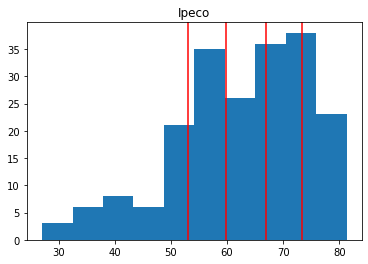

In [19]:
# Histograma del Ipeco
plt.hist(data['ipeco'])
plt.axvline(x=c1, color='r', label='c1')
plt.axvline(x=c2, color='r', label='c2')
plt.axvline(x=c3, color='r', label='c3')
plt.axvline(x=c4, color='r', label='c4')
plt.title('Ipeco')

Text(0.5, 1.0, 'Ipeco')

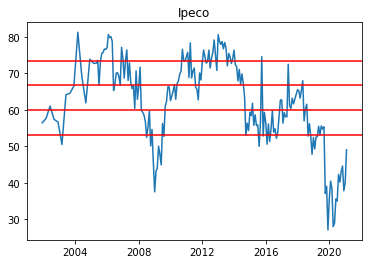

In [20]:
# Ipeco serie de tiempo
plt.plot(data['ipeco'])
plt.axhline(y=c1, color='r', label='c1')
plt.axhline(y=c2, color='r', label='c2')
plt.axhline(y=c3, color='r', label='c3')
plt.axhline(y=c4, color='r', label='c4')
plt.title('Ipeco')

In [21]:
def gen_escala(datos, variable):
    '''
    datos = DataFrame.
    variable = texto con el nombre de la variable.
    '''
    
    c1, c2, c3, c4 = datos[variable].quantile([0.2, 0.4, 0.6, 0.8])

    clasificacion = []
    for e in datos[variable]:
        if e < c1:
            clasificacion.append('Muy pesimista')
        elif e >= c1 and e < c2:
            clasificacion.append('Pesimista')
        elif e >= c2 and e < c3:
            clasificacion.append('Neutral')
        elif e >= c3 and e < c4:
            clasificacion.append('Optimista')
        else:
            clasificacion.append('Muy optimista')

    return pd.DataFrame(clasificacion, index=datos[variable].index, columns=['clasificacion'])


In [22]:
clasificacion = gen_escala(data, 'ipeco')
ipeco = pd.concat([data['ipeco'], clasificacion], axis=1)
ipeco.to_csv('ipeco.csv')

pd.set_option('display.max_rows', None) 
ipeco


,ipeco,clasificacion
Mes,,
2001-12-01,56.446503,Pesimista
2002-03-01,57.660103,Pesimista
2002-06-01,61.052537,Neutral
2002-09-01,57.394804,Pesimista
2002-12-01,56.661000,Pesimista
2003-03-01,50.491397,Muy pesimista
2003-06-01,64.145806,Neutral
2003-09-01,64.569155,Neutral
2003-12-01,66.556071,Neutral
